In [462]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook


class Initiator():
    def __init__(self):
        pass
            
    def initChr(self, pool, v=1):
        if v==1:
            '''
            randomly assign jobs to machines
            '''
            for cx in range(pool.shape[2]):
                for gx in range(pool.shape[1]):
                    r = np.random.randint(pool.shape[0])
                    pool[r,gx,cx] = 1
        elif v==2:
            '''
            Each machine gets same amount of jobs
            '''
            for cx in range(pool.shape[2]):
                j_p_m = int(pool.shape[1]/pool.shape[0])
                jobs = list(range(pool.shape[1]))
                for mx in range(pool.shape[0]):
                    # take j_p_m random jobs and assign to machine:
                    jxx = np.random.permutation(len(jobs))[:j_p_m]
                    for jy in jxx:
                        pool[mx,jy,cx] = 1
                    jobs = [j for ix,j in enumerate(jobs) if not ix in jxx]
        return pool

class Mutator():
    def __int__(self):
        pass
    
    def mutate(self, pool, m_prob=0.01, n_mutations=10, v=1):
        new_pool = []
        for cx in range(pool.shape[-1]):
            n_p = self._mutate(pool[:,:,cx], m_prob=m_prob, n_mutations=n_mutations, v=v)
            new_pool.append(n_p)
        return np.dstack(new_pool)
        
    
    def _mutate(self,chromosome, m_prob=0.01, n_mutations=10,v=1):
        if v==1:
            '''
            create singular mutation of gene
            '''
            new_pool = []
            for i in range(n_mutations):
                chrom = chromosome.copy()
                for gene in range(chrom.shape[1]):
                    if np.random.uniform() > m_prob:
                        continue
                    # find currently assigned machine, delete assignment
                    mx = np.argmax(chrom[:,gene])
                    chrom[mx,gene] = 0
                    # assign to different machine:
                    myy = list(range(0,chrom.shape[0],1))
                    myy.remove(mx)
                    my = np.random.choice(myy)
                    chrom[my,gene] = 1
                new_pool.append(chrom)
        if v==2:
            '''
            choose some gene, create all possible mutations simoultaneously
            '''
            new_pool = []
            for i in range(n_mutations):
                # select gene
                gx = np.random.randint(chromosome.shape[1])
                # find currently assigned machine, delete assignment
                mx = np.argmax(chromosome[:,gx])
                tmp = []
                # iterate over all machines, create new chrom, set assignment to 1 for current machine
                for mxx in range(chromosome.shape[0]):
                    if mxx == mx:
                        continue
                    chrom = chromosome.copy()
                    chrom[:,  gx] = 0
                    chrom[mxx,gx] = 1
                    tmp.append(chrom)
                new_pool.extend(tmp)
        new_pool = np.dstack(new_pool)
        return new_pool
                    
                
class Splicer():
    def __init__(self):
        pass
    
    def crossover(self, pool, n_crossovers=10, v=1):
        new_pool = []
        for n in range (n_crossovers):
            rx,ry = np.random.randint(pool.shape[-1],size=2)
            chrom1 = pool[:,:,rx]
            chrom2 = pool[:,:,ry]
            n_p = self._crossover(chrom1, chrom2, n_crossovers=n_crossovers, v=v)
            new_pool.append(n_p)
        return np.dstack(new_pool)
        
        
    def _crossover(self, chrom1, chrom2 , n_crossovers=10, v=1):
        new_pool = []
        if v==1:
            '''
            single crossover at random place
            '''
            for cx in range(n_crossovers):
                ix = np.random.randint(chrom1.shape[1])
                tmp1 = chrom1.copy()
                tmp2 = chrom2.copy()
                #
                tmp1[:,:ix] = chrom2[:,:ix]
                tmp2[:,:ix] = chrom1[:,:ix]
                new_pool.extend([tmp1,tmp2])
        if v==2:
            '''
            exchange multiply genes 
            '''
            for cx in range(n_crossovers):                
                ix = np.random.permutation(chrom1.shape[1])[:np.random.randint(chrom1.shape[1])]
                tmp1 = chrom1.copy()
                tmp2 = chrom2.copy()
                #
                tmp1[:,ix] = chrom2[:,ix]
                tmp2[:,ix] = chrom1[:,ix]
                new_pool.extend([tmp1,tmp2])
        new_pool = np.dstack(new_pool)
        return new_pool
        
                
class Selector():
    def __init__(self):
        pass
    
    def calcCosts(self,pool,jobs):
        costs = []
        for cx in range(pool.shape[-1]):
            c = np.dot(pool[:,:,cx],jobs.T)
            costs.append(np.max(c))
        return costs
    
    def calcFitness(self, pool, jobs):
        costs = self.calcCosts(pool, jobs)
        fitness = np.max(costs)-costs
        if np.all(fitness == 0.):
            fitness = np.ones(fitness.shape)
        return  fitness
    
    def select(self, pool, jobs, n_selections, v=1):
        if v==1:
            '''
            select best
            '''
            costs = self.calcCosts(pool,jobs)
            rx = np.argsort(costs)[:n_selections]
            new_pool = pool[:,:,rx]
        elif v==2:
            '''
            select based on fitness
            (roulette) + return fittest in any case
            '''
            fitness = self.calcFitness(pool,jobs)
            sxx = [np.argmax(fitness)]
            cumFit = np.cumsum(fitness)/np.sum(fitness)
            #cumCosts = np.hstack(([0],cumCosts))
            for s in range(n_selections):
                r = np.random.uniform()
                sx = np.where(r<cumFit)[0][0]
                sxx.append(sx)
            sxx = np.array(sxx)
            new_pool = pool[:,:,sxx]
        return new_pool
        
                
            

<IPython.core.display.Javascript object>


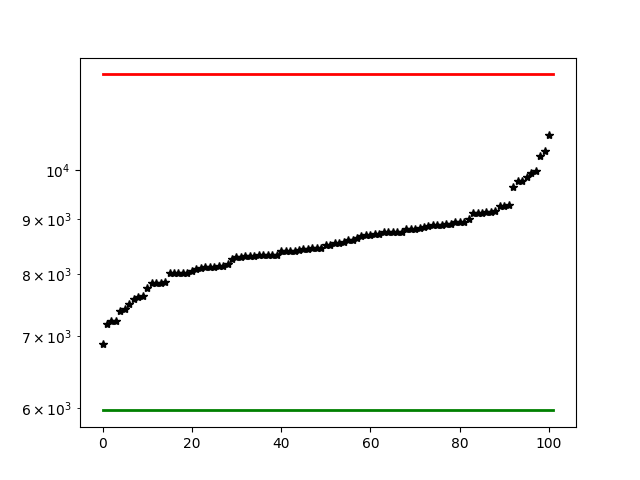

it:    0 |  sum(jobs)/n_machines:  5968.862 | best:  8010.803 | mean:  9427.827 | worst: 12267.761


KeyboardInterrupt: 

In [476]:
init = Initiator()
mutator = Mutator()
splicer = Splicer()
selector = Selector()

task = 1

if task == 1:
    jobs = np.hstack((np.random.uniform(10,1000,size=(200)),
                           np.random.uniform(100,300,size=(100))))
elif task == 2:
    jobs = np.hstack((np.random.uniform(10,1000,size=(150)),
                           np.random.uniform(400,700,size=(150))))
elif task == 3:
    jobs = np.hstack(3*[50]+2*list(range(51,100)))
'''
population pool metadata
'''
if task == 3:
    n_machines = 50
else:
    n_machines = 20
    
n_chromosomes = 10



'''
initialize the pool
'''
pool = np.zeros([n_machines,jobs.shape[0],n_chromosomes])
pool = init.initChr(pool,v=1)


'''
recording variables
'''
h_min = []
h_mean = []
h_opt = []
th_opt = np.sum(jobs)/n_machines

f,ax = plt.subplots()
f.canvas.show()

'''
Training Loop
'''
m_rate = 0.01
n_generations = 1000
m_costs = None
for generation in range(n_generations):
    m_rate *= .999
    # splice chromosome in pool them
    spliced = splicer.crossover(pool, n_crossovers=10, v=2)
    # mutate them
    mutated = mutator.mutate(pool,m_prob=m_rate, n_mutations=20, v=1)
    # add both variants into pool
    pool = np.dstack((pool,spliced,mutated))
    # select chromosomes for pool
    pool    = selector.select(pool,jobs,100,v=2)
    
    # record progress
    costs = selector.calcCosts(pool,jobs)
    if m_costs is None:
        m_costs = np.max(costs)
    h_min.append(np.min(costs))
    h_mean.append(np.mean(costs))
    h_opt.append(th_opt)
    
    # plot progess
    ax.clear()
    ax.plot(np.sort(costs),'k*')
    ax.plot([0,pool.shape[-1]],[th_opt,th_opt],'g',linewidth=2)
    ax.plot([0,pool.shape[-1]],[m_costs,m_costs],'r',linewidth=2)
    ax.set_yscale('log')
    '''
    ax.plot(h_min)
    ax.plot(h_mean)
    ax.plot(h_opt)
    ax.legend(['best','mean','sum(jobs)/n_machines'])
    '''
    f.canvas.draw()
    if (generation%50==0) or (generation==n_generations):
                print('it: {0:4d} |  sum(jobs)/n_machines: {4:9.3f} | best: {1:9.3f} | mean: {2:9.3f} | worst: {3:9.3f}'.format(generation,
                                                                                       np.min(costs),
                                                                                       np.mean(costs),
                                                                                       np.max(costs),
                                                                                       th_opt))
ix = np.argmin(costs)
am = np.argmax(pool[:,:,ix],0)
m_costs = np.dot(pool[:,:,ix],jobs)
print()
print()
for mx in range(n_machines):
        assigned = np.where(am==mx)[0]
        j_costs = jobs[assigned].astype('int')
        print('machine #: {0:2d} | costs: {2:5.2f} | j_costs: {3}'.format(mx,
                                                                                   assigned,
                                                                                   m_costs[mx],
                                                                                   j_costs))